In [39]:
import numpy as np
import pandas as pd

import os

In [40]:
%matplotlib inline
np.random.seed(42)
import matplotlib as mpl
import matplotlib.pyplot as plt

In [41]:
mpl.rc('axes', labelsize = 14)
mpl.rc('xtick', labelsize = 12)
mpl.rc('ytick', labelsize = 12)

In [42]:
def load_data(path = ''):
    csv_path = os.path.join(path, "mnist_784.csv")
    return pd.read_csv(csv_path)

In [43]:
images = load_data()

In [44]:
images.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [45]:
images_np = images.to_numpy()
images_np

array([[0, 0, 0, ..., 0, 0, 5],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 4],
       ...,
       [0, 0, 0, ..., 0, 0, 4],
       [0, 0, 0, ..., 0, 0, 5],
       [0, 0, 0, ..., 0, 0, 6]])

In [46]:
x = images_np[:,:-1]
y = images_np[:,-1:]

In [47]:
some_digit = x[0]
some_digit_image = some_digit.reshape(28,28)

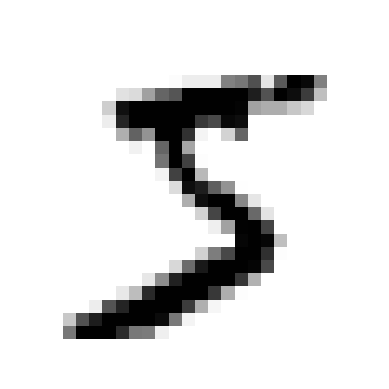

In [48]:
plt.imshow(some_digit_image, cmap=mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [49]:
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]

# Train a binary classifier

--> is-5-classifier

In [50]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

# SGD Classifier

In [51]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train_5)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(random_state=42)

In [52]:
sgd_clf.predict([some_digit])

array([ True])

## Performance Measures

## Cross Validation

In [53]:
from sklearn.model_selection import cross_val_score

scores_sgd_clf = cross_val_score(sgd_clf, x_train, y_train_5, scoring="accuracy", cv=3)
scores_sgd_clf

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.95035, 0.96035, 0.9604 ])

### Dummy Classifier (worst case)

In [54]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(x_train, y_train_5)
print(any(dummy_clf.predict(x_train)))

False


In [55]:
cross_val_score(dummy_clf, x_train, y_train_5, scoring="accuracy", cv=3)

array([0.90965, 0.90965, 0.90965])

## Confusion Matrix

In [56]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [57]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

### Best case (all values correct)

In [58]:
confusion_matrix(y_train_5, y_train_5)

array([[54579,     0],
       [    0,  5421]])

## Precision & Recall

In [59]:
from sklearn.metrics import precision_score, recall_score

In [60]:
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [61]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

Threshold

In [62]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [63]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [64]:
threshold = 3000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [65]:
y_scores = cross_val_predict(sgd_clf, x_train, y_train_5.ravel(), method="decision_function", cv=3)
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [66]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

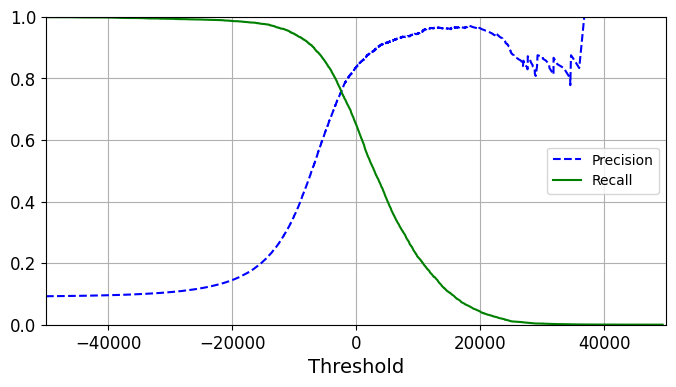

In [67]:
plt.figure(figsize=(8, 4))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
plt.show()

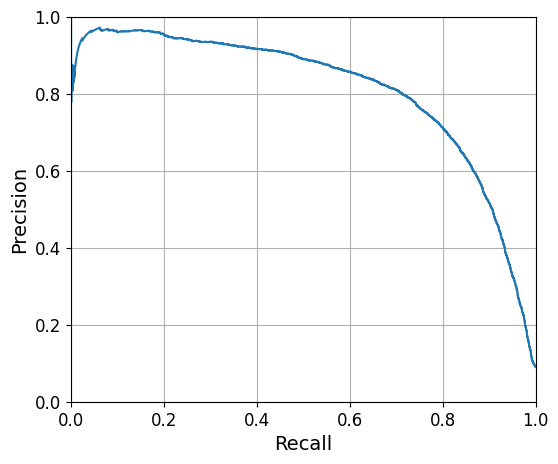

In [68]:
plt.figure(figsize=(6,5))
plt.plot(recalls, precisions)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid()
plt.axis([0, 1, 0, 1])
plt.show()

In [69]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_percision = thresholds[idx_for_90_precision]
threshold_for_90_percision

3370.019499143957

In [70]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [71]:
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_percision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

(0.0, 1.0, 0.0, 1.0)

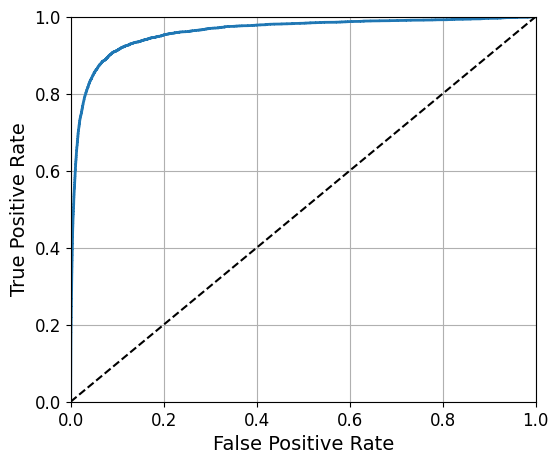

In [72]:
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.axis([0, 1, 0, 1])